Action: gender:   0%|                                                                            | 0/3 [00:00<?, ?it/s]

Action: emotion:  33%|██████████████████████▎                                            | 1/3 [00:13<00:26, 13.02s/it]

Action: race:  67%|██████████████████████████████████████████████▋                       | 2/3 [00:18<00:10, 10.63s/it]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:22<00:00,  7.44s/it]


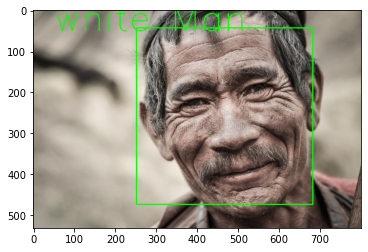

In [105]:
import tensorflow as tf

# for image detection
import cv2

# for plotting the image / graph
import matplotlib.pyplot as plt 


img = cv2.imread('sad_nepali.jpg')

# plt.imshow(img) #by default BGR

# by default BGR so convert it to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# import deepface a pre-trained library for the face detection(emotions, gender, race, age etc approximately)
from deepface import DeepFace

# now analyze the image using deepface

predictions = DeepFace.analyze(img, actions = ['gender','emotion', 'race'], enforce_detection = False)
predictions

type(predictions)
predictions['gender'] + " is of " + predictions['dominant_race'] + " race and is " +  predictions['dominant_emotion'] + " in facial expression."

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

# detect  the face to draw rectangles
for(x,y,w,h) in faces :
    cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),2)
    
# show the RECTANGLE AROUND FACE
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


# lets put text just next to face
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(
            img, 
            predictions['dominant_race'] + " " + predictions['gender'],
            (50,50),
            font,
            3,
            (0,255,0),
            2,
            cv2.LINE_4
           );

# show the line
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))